In [19]:
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import seaborn as sns

In [3]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df = df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 0)

In [6]:
df["v1"] = df["v1"].map({"ham": 0, "spam": 1})

In [7]:
df["v2"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [8]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[!@?,.*]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

df["v2"] = df["v2"].apply(preprocess_text)


In [9]:
df["v2"] = df["v2"].apply(lambda x : " ".join(x))

In [10]:
df["v2"]

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i do n't think he go to usf he life around...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ì_ b going to esplanade fr home
5569      pity wa in mood for that soany other suggestion
5570    the guy did some bitching but i acted like i '...
5571                              rofl it true to it name
Name: v2, Length: 5572, dtype: object

In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["v2"])


In [12]:
X

<5572x8693 sparse matrix of type '<class 'numpy.float64'>'
	with 72758 stored elements in Compressed Sparse Row format>

In [15]:
y = df["v1"]

In [16]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

<Axes: xlabel='v1', ylabel='count'>

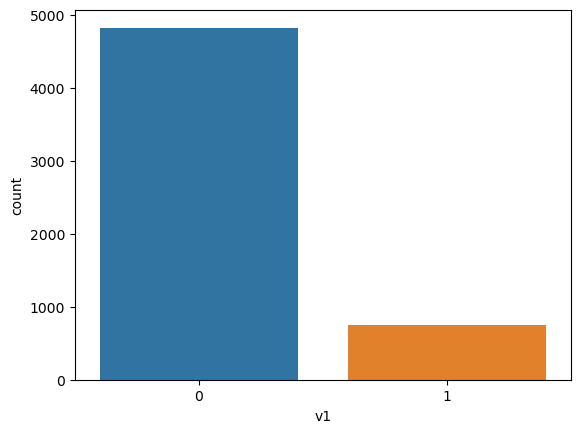

In [20]:
sns.countplot(x='v1', data=df)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [132]:
df["v2"]

0       [   ' g o   '   ,   ' u n t i l   '   ,   ' j ...
1       [   ' o k   '   ,   ' l a r   '   ,   ' j o k ...
2       [   ' f r e e   '   ,   ' e n t r y   '   ,   ...
3       [   '   u   '   ,   ' d u n   '   ,   ' s a y ...
4       [   ' n a h   '   ,   '   i   '   ,   ' d o   ...
                              ...                        
5567    [   ' t h i s   '   ,   ' i s   '   ,   ' t h ...
5568    [   ' w i l l   '   ,   ' ì _   '   ,   '   b ...
5569    [   ' p i t y   '   ,   ' w a s   '   ,   ' i ...
5570    [   ' t h e   '   ,   ' g u y   '   ,   ' d i ...
5571    [   ' r o f l   '   ,   ' i t s   '   ,   ' t ...
Name: v2, Length: 5572, dtype: object

In [21]:
models = {"XGBClassifier" : XGBClassifier(), "XGBRFClassifier" : XGBRFClassifier(), 
          "LGBMClassifier" : LGBMClassifier(),  
          "RandomForestClassifier" : RandomForestClassifier()}

for name, model in models.items():
    print(name)
    train = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print("F1 Score")
    print(f1_score(y_test, prediction))
    print("Roc Auc Score")
    print(roc_auc_score(y_test, prediction))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, prediction))

XGBClassifier
F1 Score
0.9333333333333333
Roc Auc Score
0.9422970639032816
Confusion Matrix
[[963   2]
 [ 17 133]]
XGBRFClassifier
F1 Score
0.849624060150376
Roc Auc Score
0.8751122625215889
Confusion Matrix
[[962   3]
 [ 37 113]]
LGBMClassifier
[LightGBM] [Info] Number of positive: 597, number of negative: 3860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13159
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 457
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.133947 -> initscore=-1.866505
[LightGBM] [Info] Start training from score -1.866505
F1 Score
0.9198606271777003
Roc Auc Score
0.9374093264248704
Confusion Matrix
[[960   5]
 [ 18 132]]
RandomForestClassifier
F1 Score
0.8970588235294117
Roc Auc Score
0.9066666666666667
Confusion Mat